**ASSIGNMENT-2**

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from time import process_time  


**(i) Perform data pre-processing steps on the dataset. Handle missing values (if any), explore the correlation between variables, and identify any potential outliers.**

**Preprocessing**

In [11]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx"
data = pd.read_excel(url)
data

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [12]:
#checking null values
data.isnull()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False,False


In [13]:
#checking no of null values
data.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

In [14]:
#removing null values
df=data.dropna()
df

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [15]:
#again checking no of null rows
df.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

**Inputation**

In [32]:
for i in data.columns:
    mean_value = data[i].mean()  # Calculate the mean of the column
    data[i].fillna(mean_value, inplace=True)  # Fill NaN values with the mean
data

C:\Users\tanya\AppData\Local\Temp\ipykernel_36380\3940943908.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[i].fillna(mean_value, inplace=True)  # Fill NaN values with the mean


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.980000,514.500000,294.0,110.250000,7.00,2.0,0.000000,0.0000,15.550000,21.33000
1,0.980000,514.500000,294.0,110.250000,7.00,3.0,0.000000,0.0000,15.550000,21.33000
2,0.980000,514.500000,294.0,110.250000,7.00,4.0,0.000000,0.0000,15.550000,21.33000
3,0.980000,514.500000,294.0,110.250000,7.00,5.0,0.000000,0.0000,15.550000,21.33000
4,0.900000,563.500000,318.5,122.500000,7.00,2.0,0.000000,0.0000,20.840000,28.28000
...,...,...,...,...,...,...,...,...,...,...
1291,0.764167,671.708333,318.5,176.604167,5.25,3.5,0.234375,2.8125,22.307201,24.58776
1292,0.764167,671.708333,318.5,176.604167,5.25,3.5,0.234375,2.8125,22.307201,24.58776
1293,0.764167,671.708333,318.5,176.604167,5.25,3.5,0.234375,2.8125,22.307201,24.58776
1294,0.764167,671.708333,318.5,176.604167,5.25,3.5,0.234375,2.8125,22.307201,24.58776


**Correlation Analysis**

In [16]:
corr = data.corr(method = 'pearson')
corr

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
X1,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,4.678592e-17,-2.960552e-15,-7.107006e-16,0.622272,0.634339
X2,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,-3.459372e-17,3.636925e-15,2.438409e-15,-0.658120,-0.672999
X3,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,-2.429499e-17,-8.567455e-17,2.067384e-16,0.455671,0.427117
X4,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,-5.830058e-17,-1.759011e-15,-1.078071e-15,-0.861828,-0.862547
X5,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,4.492205e-17,1.489134e-17,-2.920613e-17,0.889430,0.895785
X6,4.678592e-17,-3.459372e-17,-2.429499e-17,-5.830058e-17,4.492205e-17,1.000000e+00,-9.406007e-16,-2.549352e-16,-0.002587,0.014290
X7,-2.960552e-15,3.636925e-15,-8.567455e-17,-1.759011e-15,1.489134e-17,-9.406007e-16,1.000000e+00,2.129642e-01,0.269842,0.207505
X8,-7.107006e-16,2.438409e-15,2.067384e-16,-1.078071e-15,-2.920613e-17,-2.549352e-16,2.129642e-01,1.000000e+00,0.087368,0.050525
Y1,6.222719e-01,-6.581199e-01,4.556714e-01,-8.618281e-01,8.894305e-01,-2.586763e-03,2.698417e-01,8.736846e-02,1.000000,0.975862
Y2,6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,1.428960e-02,2.075050e-01,5.052512e-02,0.975862,1.000000


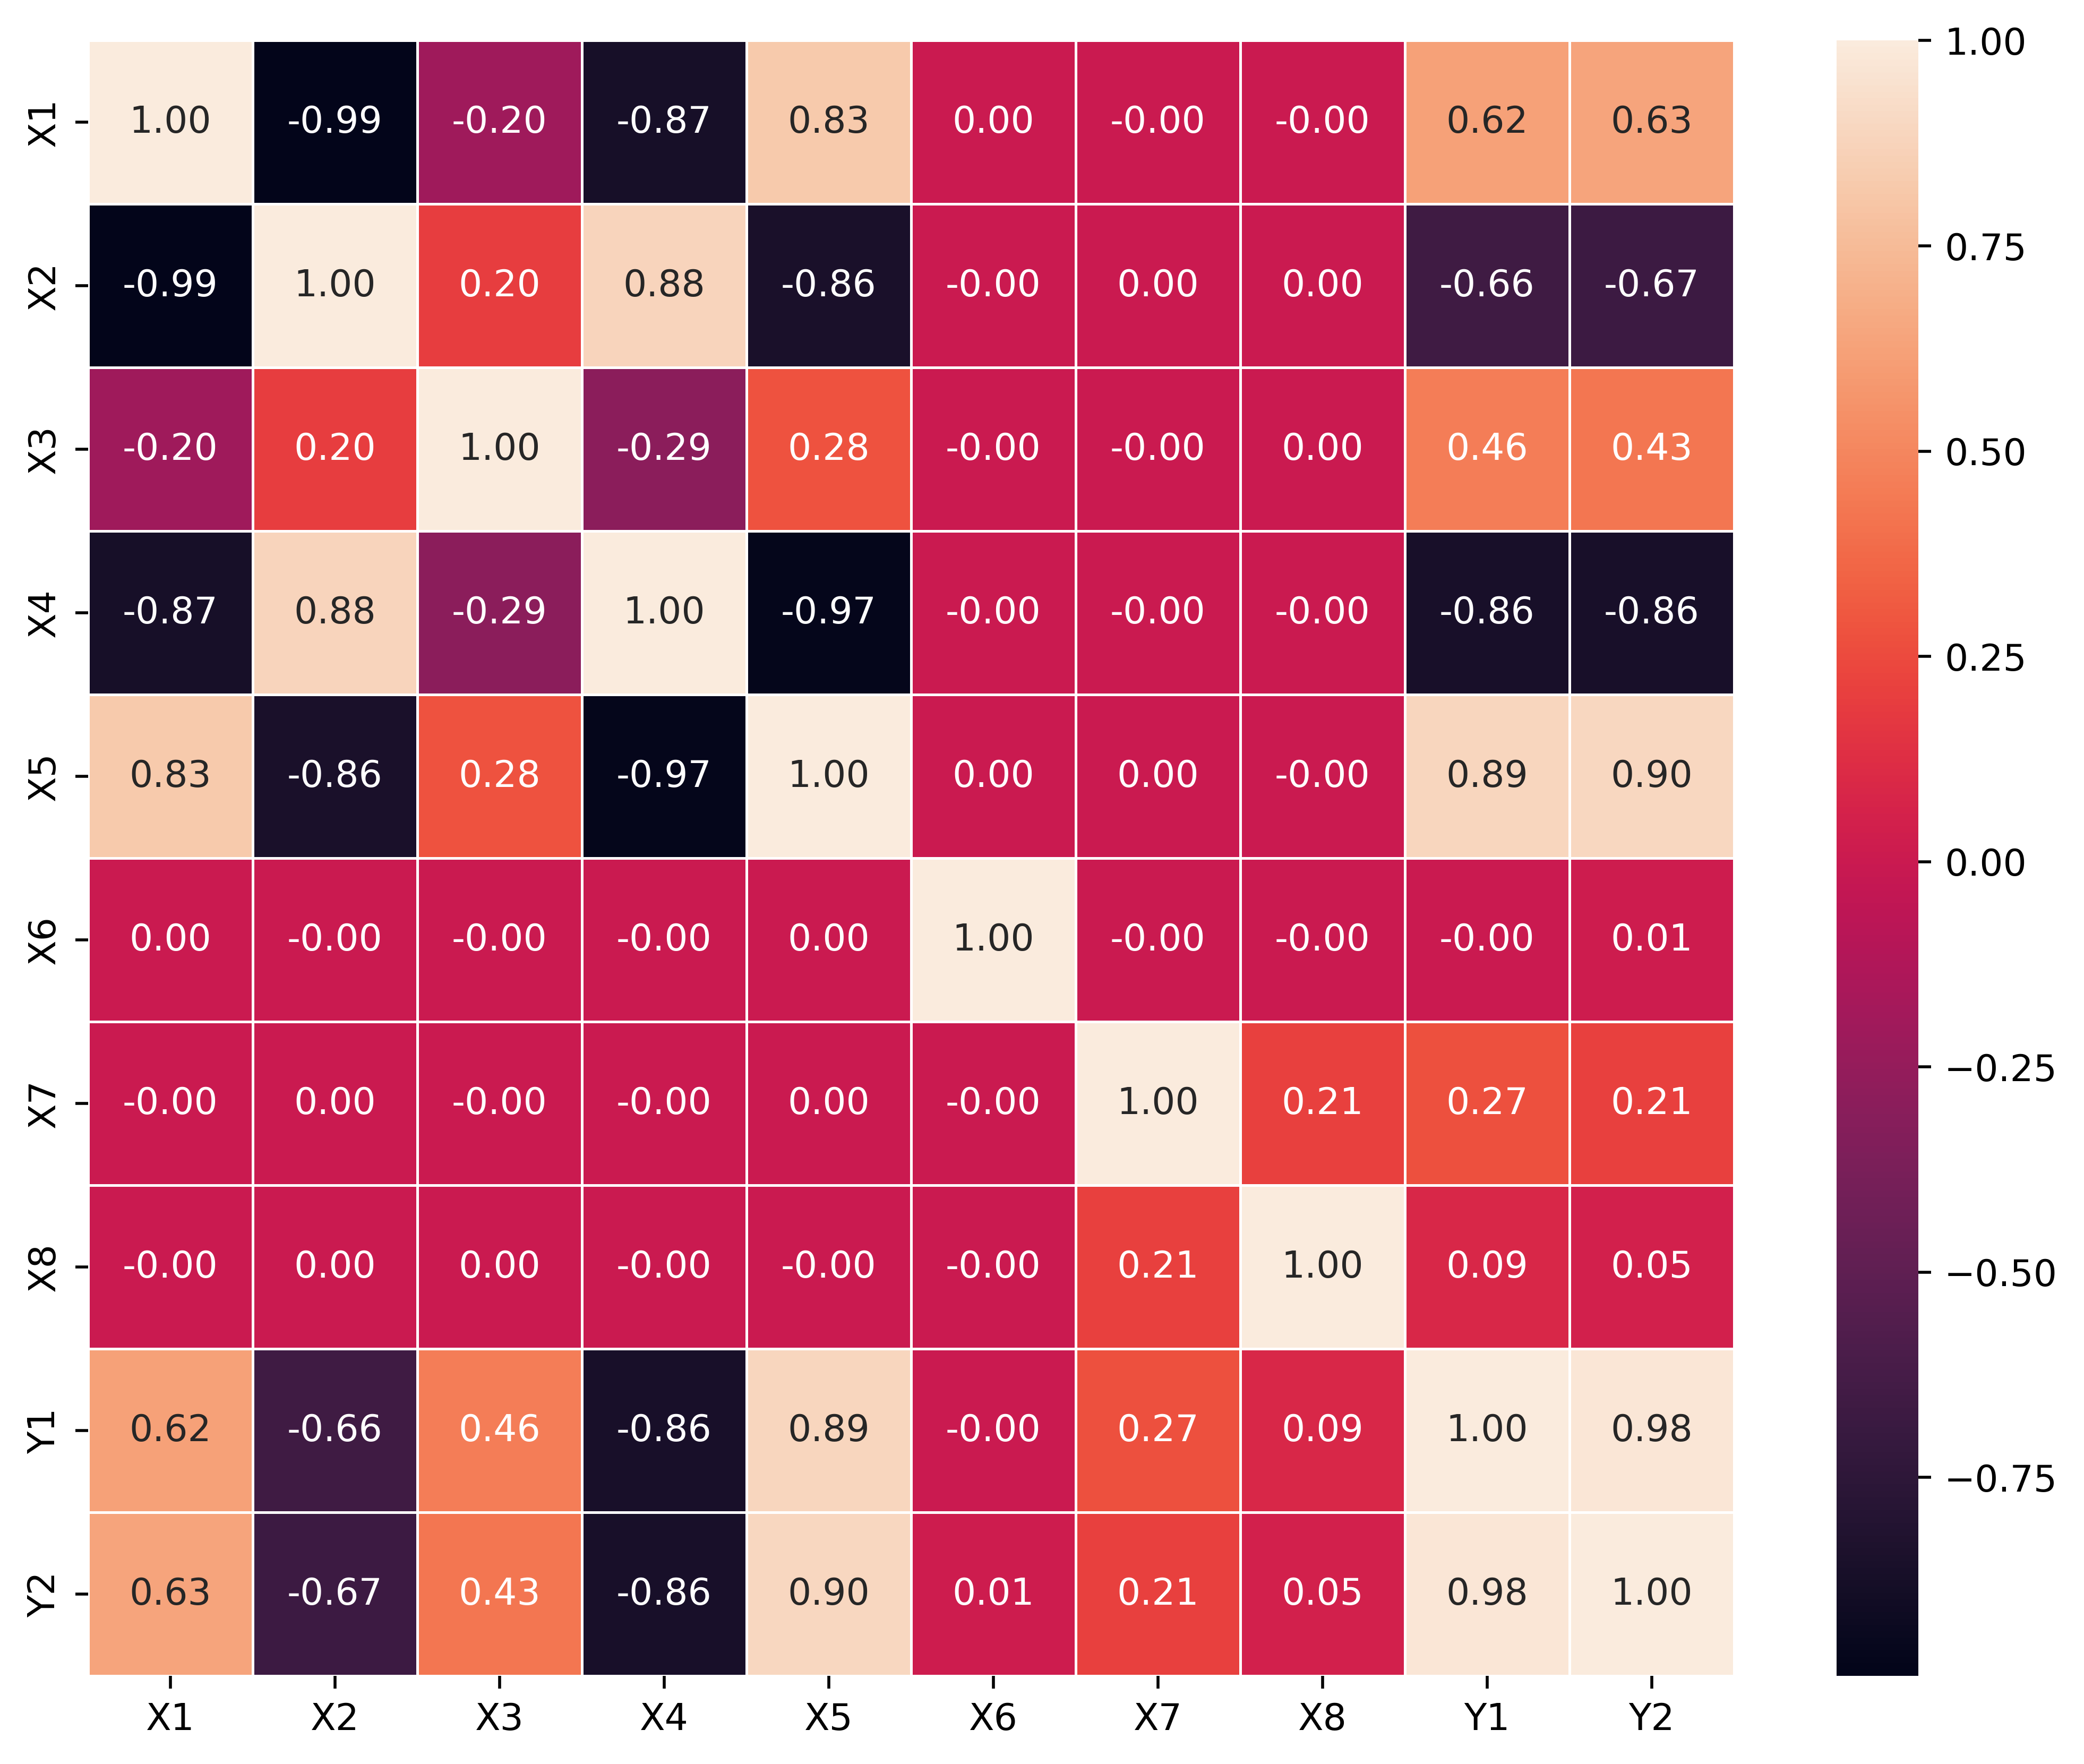

In [17]:
plt.figure(figsize=(10,8), dpi =500)
sns.heatmap(corr,annot=True,fmt=".2f", linewidth=.5)
plt.show()

**Outliers**

In [18]:
mean=df["Y1"].mean()
std_dev=df["Y1"].std()
print("mean:", int(mean))
print("standard deviation:" , int(std_dev))

mean: 22
standard deviation: 10


In [19]:
highest_allowed=mean+3*std_dev
lowest_allowed=mean-3*std_dev
print("highest_allowed:",highest_allowed)
print("lowest_allowed:",lowest_allowed)

highest_allowed: 52.57780722306107
lowest_allowed: -7.963416598061073


In [20]:
df[(df["Y1"]>highest_allowed) | (df["Y1"]<lowest_allowed )] #Printing outliers


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2


In [42]:
#There is no outlier present in Y1

**(ii) Split the dataset into an 80:20 ratio for training and testing using the sklearn library.**

In [43]:
X = ['X1','X2','X4','X5','X7']
Y = ['Y1']
x = data[X]
y = data[Y]

x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=104, train_size=0.8, shuffle=True) 

print('x_train : ') 
print(x_train.head()) 
print(x_train.shape) 
print('') 
print('x_test : ') 
print(x_test.head()) 
print(x_test.shape) 
print('') 
print('y_train : ') 
print(y_train.head()) 
print(y_train.shape) 
print('') 
print('y_test : ') 
print(y_test.head()) 
print(y_test.shape)



x_train : 
            X1          X2          X4    X5        X7
502   0.760000  661.500000  122.500000  7.00  0.250000
832   0.764167  671.708333  176.604167  5.25  0.234375
653   0.710000  710.500000  220.500000  3.50  0.400000
870   0.764167  671.708333  176.604167  5.25  0.234375
1148  0.764167  671.708333  176.604167  5.25  0.234375
(1036, 5)

x_test : 
           X1          X2          X4    X5        X7
698  0.740000  686.000000  220.500000  3.50  0.400000
670  0.620000  808.500000  220.500000  3.50  0.400000
455  0.760000  661.500000  122.500000  7.00  0.250000
922  0.764167  671.708333  176.604167  5.25  0.234375
204  0.820000  612.500000  147.000000  7.00  0.100000
(260, 5)

y_train : 
             Y1
502   36.060000
832   22.307201
653   14.030000
870   22.307201
1148  22.307201
(1036, 1)

y_test : 
            Y1
698  14.320000
670  16.550000
455  36.260000
922  22.307201
204  23.800000
(260, 1)


**Train a multivariate linear regression model from scratch using numpy, pandas, and matplotlib. Additionally, train a linear regression model using the sklearn library on the training dataset. Also train ridge and lasso regression model using the sklearn library on the training dataset**

Mean Squared Error (Training Data): 8.616447714171889


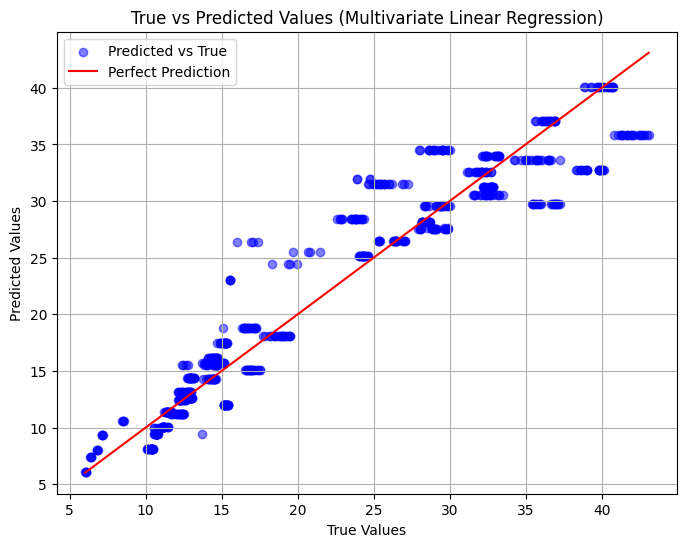

Intercept (theta_0): [84.38647107]
Coefficients (theta_1 to theta_5): [[-6.47734319e+01]
 [-2.64761432e-02]
 [-1.21626451e-01]
 [ 4.16995371e+00]
 [ 2.04379683e+01]]


In [21]:

x_train = df[['X1', 'X2', 'X4', 'X5', 'X7']] 
y_train = df[['Y1']]

X_b = np.c_[np.ones((x_train.shape[0], 1)), x_train]  

theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)


intercept = theta_best[0]
coefficients = theta_best[1:]

y_pred_train = X_b.dot(theta_best)


mse_train = np.mean((y_train.values - y_pred_train) ** 2)
print(f'Mean Squared Error (Training Data): {mse_train}')

plt.figure(figsize=(8, 6))
plt.scatter(y_train.values, y_pred_train, color='blue', alpha=0.5, label='Predicted vs True')
plt.plot([min(y_train.values), max(y_train.values)], [min(y_train.values), max(y_train.values)], color='red', label='Perfect Prediction')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values (Multivariate Linear Regression)')
plt.legend()
plt.grid(True)
plt.show()

# Results
print("Intercept (theta_0):", intercept)
print("Coefficients (theta_1 to theta_5):", coefficients)


**Sklearn Regression**

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score




# Assuming the target variable is the last column, you can adjust based on your dataset
X = data.drop(columns=[data.columns[-1]])  # Features (excluding target column)
y = data[data.columns[-1]]  # Target (last column in the dataset)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = model.predict(x_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared score

print(f"Mean Squared Error: {mse}")
print(f"R-squared score: {r2}")


Mean Squared Error: 4.160173597573959
R-squared score: 0.9551014714156045


**Ridge Regression**

Mean Squared Error (Ridge Regression): 9.030062010471676


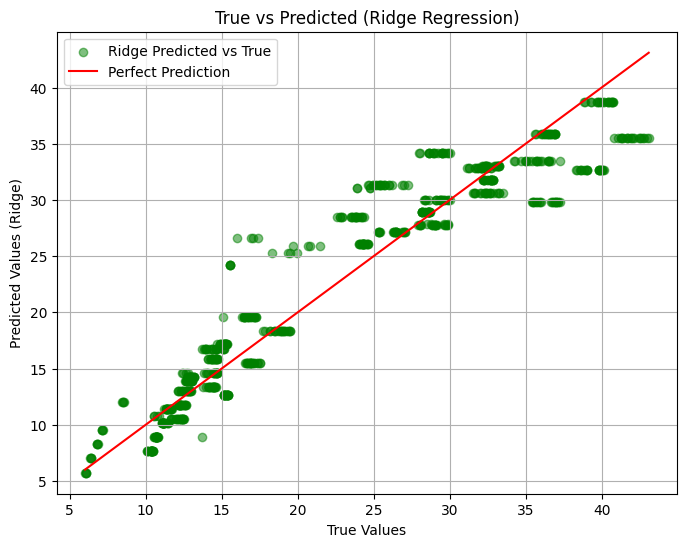

Ridge Regression Coefficients: [-4.9761565   0.04626824 -0.07913772  5.38369243 19.03930496]


In [28]:

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error



x_train = data[['X1', 'X2', 'X4', 'X5', 'X7']] 
y_train = data[['Y1']] 


ridge_model = Ridge(alpha=1.0) 
ridge_model.fit(x_train, y_train)


y_pred_train_ridge = ridge_model.predict(x_train)  


mse_train_ridge = mean_squared_error(y_train, y_pred_train_ridge)
print(f'Mean Squared Error (Ridge Regression): {mse_train_ridge}')


plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_pred_train_ridge, color='green', alpha=0.5, label='Ridge Predicted vs True')
plt.plot([min(y_train.values), max(y_train.values)], [min(y_train.values), max(y_train.values)], color='red', label='Perfect Prediction')
plt.xlabel('True Values')
plt.ylabel('Predicted Values (Ridge)')
plt.title('True vs Predicted (Ridge Regression)')
plt.legend()
plt.grid(True)
plt.show()

# Results
print("Ridge Regression Coefficients:", ridge_model.coef_)


**Lasso Regression**

Mean Squared Error (Lasso Regression): 9.684206000179243


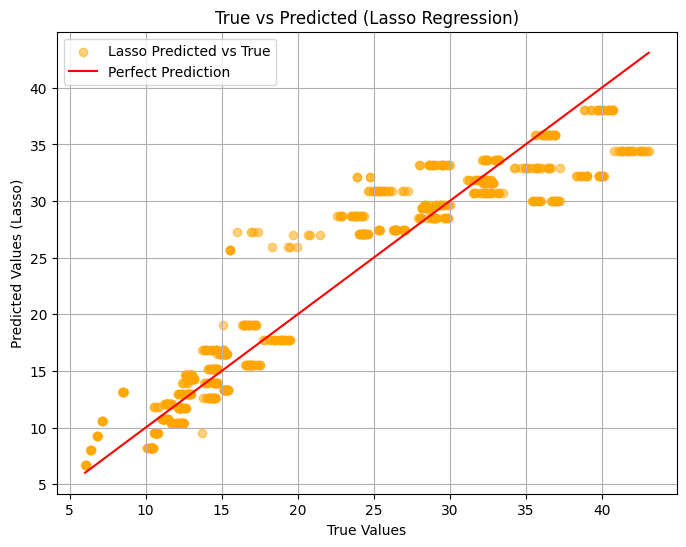

Lasso Regression Coefficients: [-0.          0.05218726 -0.09616792  4.93285078 14.79609504]


In [29]:

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error



x_train = data[['X1', 'X2', 'X4', 'X5', 'X7']] 
y_train = data[['Y1']]  

lasso_model = Lasso(alpha=0.1)  
lasso_model.fit(x_train, y_train)

y_pred_train_lasso = lasso_model.predict(x_train)  # Lasso regression predictions

mse_train_lasso = mean_squared_error(y_train, y_pred_train_lasso)
print(f'Mean Squared Error (Lasso Regression): {mse_train_lasso}')

plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_pred_train_lasso, color='orange', alpha=0.5, label='Lasso Predicted vs True')
plt.plot([min(y_train.values), max(y_train.values)], [min(y_train.values), max(y_train.values)], color='red', label='Perfect Prediction')
plt.xlabel('True Values')
plt.ylabel('Predicted Values (Lasso)')
plt.title('True vs Predicted (Lasso Regression)')
plt.legend()
plt.grid(True)
plt.show()

# Results
print("Lasso Regression Coefficients:", lasso_model.coef_)


**Evaluate the performance for each model on the test dataset using following metrics: R2 score, Mean Squared Error (MSE) and Root Mean Squared Error(RMSE). Compare the performance of the manual model and the sklearn model and plot the predicted vs actual values for both models.**

Manual Linear Regression:
R2: 0.8943624851638392, MSE: 6.305927442326281, RMSE: 2.5111605767704863

Sklearn Linear Regression:
R2: 0.8943624851648699, MSE: 6.3059274422647515, RMSE: 2.5111605767582352

Sklearn Ridge Regression:
R2: 0.891948238003606, MSE: 6.45004354960015, RMSE: 2.5396935936447433

Sklearn Lasso Regression:
R2: 0.8808680338601959, MSE: 7.111465426883751, RMSE: 2.6667331000465255



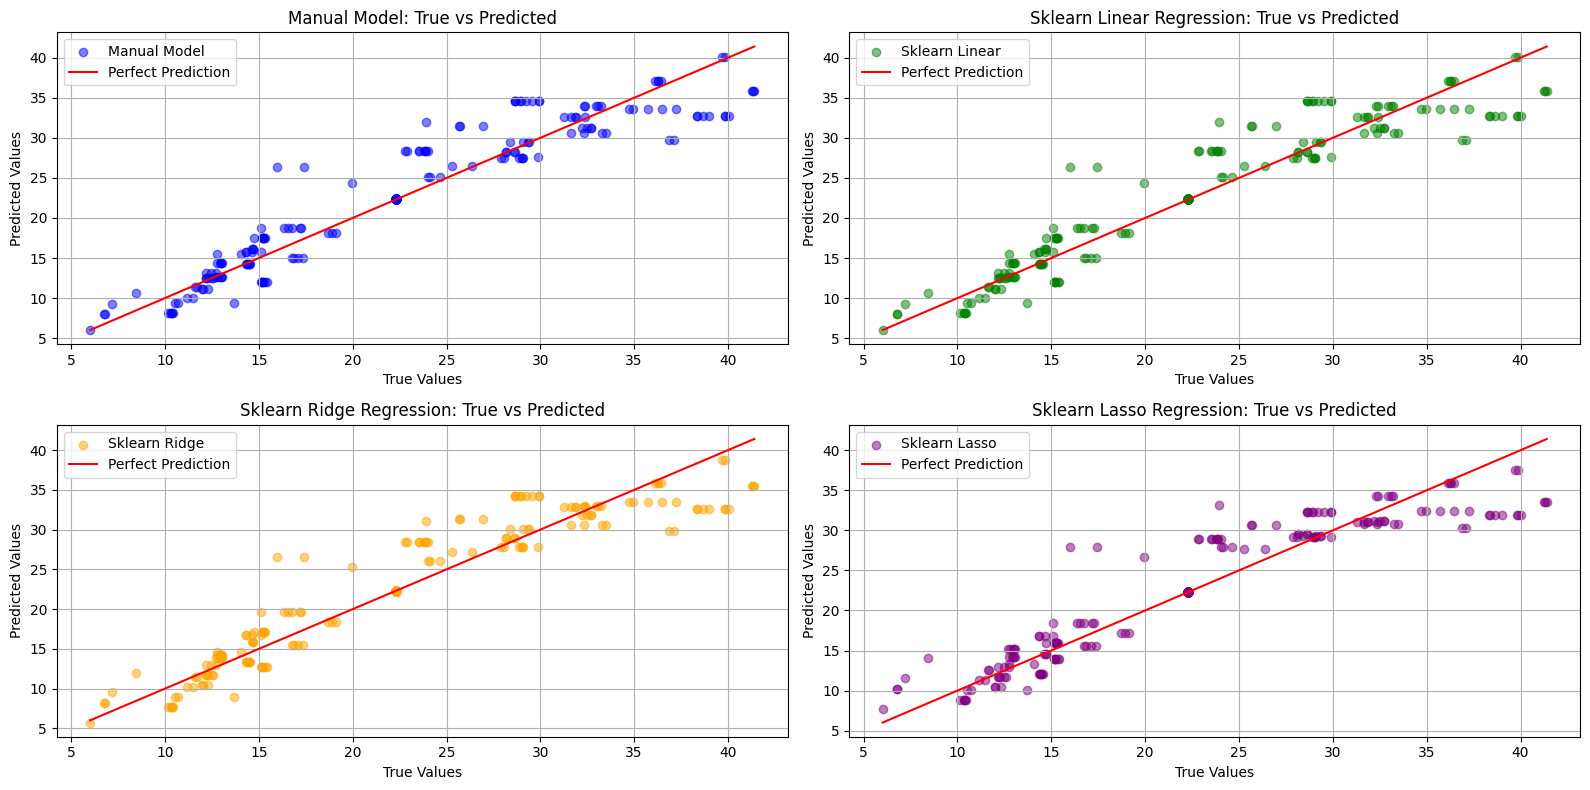

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt




X_b_train = np.c_[np.ones((x_train.shape[0], 1)), x_train] 
X_b_test = np.c_[np.ones((x_test.shape[0], 1)), x_test]   


theta_best = np.linalg.inv(X_b_train.T.dot(X_b_train)).dot(X_b_train.T).dot(y_train)
y_pred_train_manual = X_b_train.dot(theta_best)
y_pred_test_manual = X_b_test.dot(theta_best)


linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
y_pred_train_sklearn_linear = linear_model.predict(x_train)
y_pred_test_sklearn_linear = linear_model.predict(x_test)


ridge_model = Ridge(alpha=1.0)
ridge_model.fit(x_train, y_train)
y_pred_train_sklearn_ridge = ridge_model.predict(x_train)
y_pred_test_sklearn_ridge = ridge_model.predict(x_test)

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(x_train, y_train)
y_pred_train_sklearn_lasso = lasso_model.predict(x_train)
y_pred_test_sklearn_lasso = lasso_model.predict(x_test)

# Evaluate Models on Test Data

# R2, MSE, RMSE for manual model
r2_manual = r2_score(y_test, y_pred_test_manual)
mse_manual = mean_squared_error(y_test, y_pred_test_manual)
rmse_manual = sqrt(mse_manual)

# R2, MSE, RMSE for sklearn Linear Regression
r2_linear = r2_score(y_test, y_pred_test_sklearn_linear)
mse_linear = mean_squared_error(y_test, y_pred_test_sklearn_linear)
rmse_linear = sqrt(mse_linear)

# R2, MSE, RMSE for sklearn Ridge Regression
r2_ridge = r2_score(y_test, y_pred_test_sklearn_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_test_sklearn_ridge)
rmse_ridge = sqrt(mse_ridge)

# R2, MSE, RMSE for sklearn Lasso Regression
r2_lasso = r2_score(y_test, y_pred_test_sklearn_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_test_sklearn_lasso)
rmse_lasso = sqrt(mse_lasso)

# Print Metrics
print("Manual Linear Regression:")
print(f"R2: {r2_manual}, MSE: {mse_manual}, RMSE: {rmse_manual}\n")

print("Sklearn Linear Regression:")
print(f"R2: {r2_linear}, MSE: {mse_linear}, RMSE: {rmse_linear}\n")

print("Sklearn Ridge Regression:")
print(f"R2: {r2_ridge}, MSE: {mse_ridge}, RMSE: {rmse_ridge}\n")

print("Sklearn Lasso Regression:")
print(f"R2: {r2_lasso}, MSE: {mse_lasso}, RMSE: {rmse_lasso}\n")

# Visualization - Predicted vs Actual for each model
plt.figure(figsize=(16, 8))

# Manual Linear Regression
plt.subplot(2, 2, 1)
plt.scatter(y_test, y_pred_test_manual, color='blue', alpha=0.5, label='Manual Model')
plt.plot([min(y_test.values), max(y_test.values)], [min(y_test.values), max(y_test.values)], color='red', label='Perfect Prediction')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Manual Model: True vs Predicted')
plt.legend()
plt.grid(True)

# Sklearn Linear Regression
plt.subplot(2, 2, 2)
plt.scatter(y_test, y_pred_test_sklearn_linear, color='green', alpha=0.5, label='Sklearn Linear')
plt.plot([min(y_test.values), max(y_test.values)], [min(y_test.values), max(y_test.values)], color='red', label='Perfect Prediction')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Sklearn Linear Regression: True vs Predicted')
plt.legend()
plt.grid(True)

# Sklearn Ridge Regression
plt.subplot(2, 2, 3)
plt.scatter(y_test, y_pred_test_sklearn_ridge, color='orange', alpha=0.5, label='Sklearn Ridge')
plt.plot([min(y_test.values), max(y_test.values)], [min(y_test.values), max(y_test.values)], color='red', label='Perfect Prediction')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Sklearn Ridge Regression: True vs Predicted')
plt.legend()
plt.grid(True)

# Sklearn Lasso Regression
plt.subplot(2, 2, 4)
plt.scatter(y_test, y_pred_test_sklearn_lasso, color='purple', alpha=0.5, label='Sklearn Lasso')
plt.plot([min(y_test.values), max(y_test.values)], [min(y_test.values), max(y_test.values)], color='red', label='Perfect Prediction')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Sklearn Lasso Regression: True vs Predicted')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


**(v) Propose energy efficiency improvement suggestions based on the insights from the model results, focusing on building design elements that most significantly impact heating load.**

In [66]:
#Heating Load data
df["Y1"]




0      15.55
1      15.55
2      15.55
3      15.55
4      20.84
       ...  
763    17.88
764    16.54
765    16.44
766    16.48
767    16.64
Name: Y1, Length: 768, dtype: float64

**For heating loads in this range(15-20), improving system efficiency or addressing small gaps in insulation could have significant benefits.
Suggestions:
Improve Sealing and Insulation:** Even though insulation might not be the biggest contributor, improving seals around windows and doors could provide noticeable reductions in heating needs.
**Heating System Optimization:** Install or upgrade to a more efficient system, such as a high-efficiency boiler, or integrate smart heating controls that learn the building’s usage patterns.
